# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
import random

seed = 1337
random.seed(1337)
np.random.seed(1337)
torch.manual_seed(1337)
torch.backends.cudnn.deterministic = True

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher.app',seed=seed)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  4.81451988e+00 -1.00000000e+00
  6.38908386e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
  8.53890657e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)                          # initialize the score (for each agent)
# while True:
#     actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#     actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#     env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#     next_states = env_info.vector_observations         # get next state (for each agent)
#     rewards = env_info.rewards                         # get reward (for each agent)
#     dones = env_info.local_done                        # see if episode finished
#     scores += env_info.rewards                         # update the score (for each agent)
#     states = next_states                               # roll over states to next time step
#     if np.any(dones):                                  # exit loop if episode finished
#         break
# print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [6]:
# env.close()

In [7]:
# Run agent

def run_agent(model_path):
    from ppo_agent import Agent

    brain_name = env.brain_names[0]
    brain = env.brains[brain_name]
    env_info = env.reset(train_mode=False)[brain_name]
    n_ohttp://localhost:8889/notebooks/Continuous_Control.ipynb#bservations = env_info.vector_observations.shape[1]
    n_actions = brain.vector_action_space_size
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    agent = Agent(n_observations, n_actions)
    agent.load_state_dict(torch.load(model_path))

    scores = np.zeros(1)                          # initialize the score (for each agent)
    while True:
        obs = torch.Tensor(np.expand_dims(env_info.vector_observations[0], 0))
        with torch.no_grad():
            action, _, _, _ = agent.get_action_and_value(obs)
        torch.clamp(action, -1, 1)
        action = action.numpy()
        env_info = env.step(action)[brain_name]           # send all actions to the environment
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))
run_agent('checkpoints/model_step_976.pickle')

Total score (averaged over agents) this episode: 19.449999565258622


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
from ppo import run_ppo

run_ppo(env)

update 1/976. Last update in 4.0531158447265625e-06s
last 100 returns: 0.0
update 2/976. Last update in 6.2843263149261475s
last 100 returns: 0.0
update 3/976. Last update in 5.58000922203064s
last 100 returns: 0.0
update 4/976. Last update in 5.566473960876465s
last 100 returns: 0.03222222150199943
update 5/976. Last update in 5.5785441398620605s
last 100 returns: 0.02636363577436317
update 6/976. Last update in 5.743543863296509s
last 100 returns: 0.1099999975413084
update 7/976. Last update in 5.813701152801514s
last 100 returns: 0.12666666383544603
update 8/976. Last update in 5.713097810745239s
last 100 returns: 0.12470587956554749
update 9/976. Last update in 5.603249788284302s
last 100 returns: 0.14368420731472342
update 10/976. Last update in 5.694394111633301s
last 100 returns: 0.17142856759684427
update 11/976. Last update in 5.62394905090332s
last 100 returns: 0.20956521270715672
update 12/976. Last update in 5.707852125167847s
last 100 returns: 0.2191999951004982
update 13/

last 100 returns: 4.480199899859726
update 98/976. Last update in 5.5705578327178955s
last 100 returns: 4.559699898082763
update 99/976. Last update in 5.566179990768433s
last 100 returns: 4.583899897541851
update 100/976. Last update in 5.5851829051971436s
last 100 returns: 4.689399895183742
update 101/976. Last update in 5.578338861465454s
last 100 returns: 4.704299894850701
update 102/976. Last update in 5.567140817642212s
last 100 returns: 4.741599894016981
update 103/976. Last update in 5.603317022323608s
last 100 returns: 4.824999892152846
update 104/976. Last update in 5.561992883682251s
last 100 returns: 4.8741998910531406
update 105/976. Last update in 5.568240165710449s
last 100 returns: 4.887699890751391
update 106/976. Last update in 5.561268091201782s
last 100 returns: 4.838099891860038
update 107/976. Last update in 5.585862874984741s
last 100 returns: 4.786099893022328
update 108/976. Last update in 5.588524103164673s
last 100 returns: 4.765799893476069
update 109/976. L

last 100 returns: 6.164999862201512
update 194/976. Last update in 5.336605787277222s
last 100 returns: 6.176899861935526
update 195/976. Last update in 5.5644378662109375s
last 100 returns: 6.144399862661958
update 196/976. Last update in 5.606642961502075s
last 100 returns: 6.12289986314252
update 197/976. Last update in 5.57584285736084s
last 100 returns: 6.120499863196164
update 198/976. Last update in 5.583312273025513s
last 100 returns: 6.104599863551557
update 199/976. Last update in 5.549078941345215s
last 100 returns: 6.098699863683432
update 200/976. Last update in 5.567737817764282s
last 100 returns: 6.120299863200635
update 201/976. Last update in 5.582129955291748s
last 100 returns: 6.221199860945344
update 202/976. Last update in 5.585992097854614s
last 100 returns: 6.225699860844761
update 203/976. Last update in 5.577665090560913s
last 100 returns: 6.266399859935046
update 204/976. Last update in 5.457950115203857s
last 100 returns: 6.268199859894812
update 205/976. Las

last 100 returns: 7.8208998251892625
update 290/976. Last update in 5.538707256317139s
last 100 returns: 7.878599823899567
update 291/976. Last update in 5.594170093536377s
last 100 returns: 7.940299822520465
update 292/976. Last update in 5.572696685791016s
last 100 returns: 8.024199820645153
update 293/976. Last update in 5.590538024902344s
last 100 returns: 8.10369981886819
update 294/976. Last update in 5.608033895492554s
last 100 returns: 8.027499820571393
update 295/976. Last update in 5.583347797393799s
last 100 returns: 8.000799821168185
update 296/976. Last update in 5.574692010879517s
last 100 returns: 8.024099820647388
update 297/976. Last update in 5.5483057498931885s
last 100 returns: 8.102399818897247
update 298/976. Last update in 5.591913938522339s
last 100 returns: 8.068299819659442
update 299/976. Last update in 5.569691181182861s
last 100 returns: 8.200199816711248
update 300/976. Last update in 5.58922004699707s
last 100 returns: 8.246199815683067
update 301/976. La

last 100 returns: 9.609199785217642
update 386/976. Last update in 5.593290090560913s
last 100 returns: 9.630799784734846
update 387/976. Last update in 5.587512969970703s
last 100 returns: 9.748899782095105
update 388/976. Last update in 5.58339524269104s
last 100 returns: 9.641899784486741
update 389/976. Last update in 5.5654518604278564s
last 100 returns: 9.701499783154578
update 390/976. Last update in 5.604921102523804s
last 100 returns: 9.700999783165752
update 391/976. Last update in 5.591502904891968s
last 100 returns: 9.52749978704378
update 392/976. Last update in 5.589202880859375s
last 100 returns: 9.491199787855148
update 393/976. Last update in 5.604771137237549s
last 100 returns: 9.511399787403644
update 394/976. Last update in 5.5847249031066895s
last 100 returns: 9.522699787151069
update 395/976. Last update in 5.517798900604248s
last 100 returns: 9.465199788436294
update 396/976. Last update in 5.621699094772339s
last 100 returns: 9.362599790729583
update 397/976. La

last 100 returns: 10.60399976298213
update 481/976. Last update in 5.5835137367248535s
last 100 returns: 10.557699764017016
update 482/976. Last update in 5.593885898590088s
last 100 returns: 10.55259976413101
update 483/976. Last update in 5.579899787902832s
last 100 returns: 10.510699765067548
update 484/976. Last update in 5.578028917312622s
last 100 returns: 10.594099763203412
update 485/976. Last update in 5.593701124191284s
last 100 returns: 10.661099761705845
update 486/976. Last update in 5.578444004058838s
last 100 returns: 10.631599762365221
update 487/976. Last update in 5.583674192428589s
last 100 returns: 10.44959976643324
update 488/976. Last update in 5.605745315551758s
last 100 returns: 10.510199765078724
update 489/976. Last update in 5.535469055175781s
last 100 returns: 10.429399766884744
update 490/976. Last update in 5.597601652145386s
last 100 returns: 10.449699766431003
update 491/976. Last update in 5.581828832626343s
last 100 returns: 10.579899763520807
update 4

last 100 returns: 11.649499739613384
update 576/976. Last update in 5.568394899368286s
last 100 returns: 11.536999742127955
update 577/976. Last update in 5.593576192855835s
last 100 returns: 11.571199741363525
update 578/976. Last update in 5.58211874961853s
last 100 returns: 11.672499739099294
update 579/976. Last update in 5.573626756668091s
last 100 returns: 11.584899741057306
update 580/976. Last update in 5.603225946426392s
last 100 returns: 11.549499741848559
update 581/976. Last update in 5.574528932571411s
last 100 returns: 11.458899743873626
update 582/976. Last update in 5.571714162826538s
last 100 returns: 11.581499741133303
update 583/976. Last update in 5.590177059173584s
last 100 returns: 11.509799742735922
update 584/976. Last update in 5.590700149536133s
last 100 returns: 11.564599741511048
update 585/976. Last update in 5.588865041732788s
last 100 returns: 11.54829974187538
update 586/976. Last update in 5.581328868865967s
last 100 returns: 11.502599742896855
update 5

last 100 returns: 13.171799705587327
update 671/976. Last update in 5.591974973678589s
last 100 returns: 13.326199702136218
update 672/976. Last update in 5.581192970275879s
last 100 returns: 13.406299700345844
update 673/976. Last update in 5.57352089881897s
last 100 returns: 13.54939969714731
update 674/976. Last update in 5.5796990394592285s
last 100 returns: 13.565399696789681
update 675/976. Last update in 5.576045036315918s
last 100 returns: 13.434499699715525
update 676/976. Last update in 5.582801818847656s
last 100 returns: 13.567699696738273
update 677/976. Last update in 5.57969069480896s
last 100 returns: 13.591399696208537
update 678/976. Last update in 5.567962884902954s
last 100 returns: 13.683899694141001
update 679/976. Last update in 5.598784923553467s
last 100 returns: 13.684599694125355
update 680/976. Last update in 5.596436977386475s
last 100 returns: 13.785299691874535
update 681/976. Last update in 5.601524829864502s
last 100 returns: 13.648399694934488
update 6

last 100 returns: 11.296199747510254
update 766/976. Last update in 5.606599807739258s
last 100 returns: 11.527199742347001
update 767/976. Last update in 5.5787036418914795s
last 100 returns: 11.54829974187538
update 768/976. Last update in 5.640428066253662s
last 100 returns: 11.536799742132425
update 769/976. Last update in 5.5849080085754395s
last 100 returns: 11.47389974353835
update 770/976. Last update in 5.608994007110596s
last 100 returns: 11.566799741461873
update 771/976. Last update in 5.597541093826294s
last 100 returns: 11.487099743243308
update 772/976. Last update in 5.576215982437134s
last 100 returns: 11.497999742999673
update 773/976. Last update in 5.591027021408081s
last 100 returns: 11.531599742248654
update 774/976. Last update in 5.582935094833374s
last 100 returns: 11.60009974071756
update 775/976. Last update in 5.594758033752441s
last 100 returns: 11.635599739924073
update 776/976. Last update in 5.506464958190918s
last 100 returns: 11.731799737773835
update 

last 100 returns: 13.937999688461423
update 861/976. Last update in 5.599629878997803s
last 100 returns: 13.880399689748883
update 862/976. Last update in 5.5642290115356445s
last 100 returns: 13.888599689565599
update 863/976. Last update in 5.603116035461426s
last 100 returns: 14.009199686869978
update 864/976. Last update in 5.584432125091553s
last 100 returns: 14.136399684026838
update 865/976. Last update in 5.574609994888306s
last 100 returns: 14.096299684923142
update 866/976. Last update in 5.592514753341675s
last 100 returns: 14.180299683045597
update 867/976. Last update in 5.783278942108154s
last 100 returns: 14.203899682518095
update 868/976. Last update in 5.491375207901001s
last 100 returns: 14.385599678456783
update 869/976. Last update in 5.5621819496154785s
last 100 returns: 14.561099674534052
update 870/976. Last update in 5.710280895233154s
last 100 returns: 14.674699671994894
update 871/976. Last update in 5.583434104919434s
last 100 returns: 14.58239967405796
updat

last 100 returns: 14.698499671462923
update 956/976. Last update in 5.569348096847534s
last 100 returns: 14.713199671134353
update 957/976. Last update in 5.571227312088013s
last 100 returns: 14.615899673309178
update 958/976. Last update in 5.567603826522827s
last 100 returns: 14.348799679279328
update 959/976. Last update in 5.599924087524414s
last 100 returns: 14.439699677247553
update 960/976. Last update in 5.5920491218566895s
last 100 returns: 14.398199678175152
update 961/976. Last update in 5.590092897415161s
last 100 returns: 14.505199675783516
update 962/976. Last update in 5.605180263519287s
last 100 returns: 14.579799674116074
update 963/976. Last update in 5.574502944946289s
last 100 returns: 14.408499677944928
update 964/976. Last update in 5.562718868255615s
last 100 returns: 14.373799678720534
update 965/976. Last update in 5.573101043701172s
last 100 returns: 14.285399680696427
update 966/976. Last update in 5.543596982955933s
last 100 returns: 14.129699684176593
updat

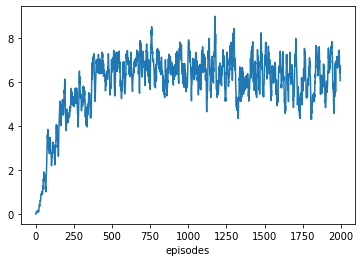

In [8]:
import pickle
import matplotlib.pyplot as plt
from collections import deque

datestamp = '230303'
with open(f'checkpoints/{datestamp}/eplen_and_returns_976.pickle', 'rb') as f:
    _, total_rewards = zip(*pickle.load(f))
    
smoothed = []
queue = deque([], maxlen=10)
for r in total_rewards:
    queue.append(r)
    smoothed.append(sum(queue)/len(queue))
fig,ax = plt.subplots()
ax.plot(smoothed)
ax.set_xlabel('episodes')
plt.savefig(f'checkpoints/{datestamp}/learning_curve.png')
plt.show()

In [9]:
# from ddpg_agent import Agent

# agent = Agent(state_size=33, action_size=4, random_seed=2)
# scores = agent.run_unity_ddpg(env)
# env.close()

# fig = plt.figure()
# ax = fig.add_subplot(111)
# plt.plot(np.arange(1, len(scores)+1), scores)
# plt.ylabel('Score')
# plt.xlabel('Episode #')
# plt.show()